<a href="https://colab.research.google.com/github/Tanulshn/Zero-to-One-Valuation/blob/main/Valuation_0_1_Stocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Objective 
To derive an alternative notation for the valuation (either PE or PB) of individual stocks to be compared with one another.



# Package Imported

For pandas, numpy and visualisation
- import pandas as pd
- import numpy as np
- import seaborn as sns
- import matplotlib.pyplot as plt
- import pylab
- %matplotlib inline
- plt.style.use('seaborn-darkgrid')

For Standardisation
- from sklearn.preprocessing import StandardScaler


In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# For q-q plot
import scipy.stats
import pylab

plt.style.use('seaborn-darkgrid')


import warnings
warnings.simplefilter(action='ignore')

In [22]:
raw_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Zero to One Valuation/Britannia data.csv')
raw_data.head()

,Date,Value,Mcap
0,2/4/2007,27.61,29.03
1,3/4/2007,27.86,29.29
2,4/4/2007,27.73,29.15
3,5/4/2007,28.02,29.46
4,6/4/2007,No Data FOund,No Data FOund


### Data PreProcessing 

In [25]:
# Check for info()
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5176 entries, 0 to 5175
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    5176 non-null   object
 1   Value   5176 non-null   object
 2   Mcap    5176 non-null   object
dtypes: object(3)
memory usage: 121.4+ KB


In [27]:
# Change datatype to float and create another df with changed datatypes
for i in ['Value','Mcap']:
  df[i]= pd.to_numeric(raw_data[i], errors= 'coerce')

print(raw_data.info(), '\n\n', df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5176 entries, 0 to 5175
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    5176 non-null   object
 1   Value   5176 non-null   object
 2   Mcap    5176 non-null   object
dtypes: object(3)
memory usage: 121.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5176 entries, 0 to 5175
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    5176 non-null   object 
 1   Value   3509 non-null   float64
 2   Mcap    3509 non-null   float64
dtypes: float64(2), object(1)
memory usage: 121.4+ KB
None 

 None


In [28]:
# Set the Datetime() format for the Date column
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df.set_index('Date', inplace=True)
df.head()

,Value,Mcap
Date,,
2007-04-02,27.61,29.03
2007-04-03,27.86,29.29
2007-04-04,27.73,29.15
2007-04-05,28.02,29.46
2007-04-06,NaN,NaN


In [30]:
# Create seperate dfs for frequncy based on 'm' and 'b'
df_m = df.resample('m').last()
df_b = df.resample('b').last()

In [48]:
for i in ['Value','Mcap']:
  df_b[i] = df_b[i].fillna(method='ffill')
  df_m[i] = df_m[i].fillna(method='ffill')

# Check for no of null
print(df_m.isnull().sum(), '\n',df_b.isnull().sum())
print('\n')
# Check the size of the 2 new dfs
print('No of months: ',len(df_m), 'and No of business days: ',len(df_b))

Value    0
Mcap     0
dtype: int64 
 Value    0
Mcap     0
dtype: int64


No of months:  171 and No of business days:  3698


In [42]:
# Check for null values


Value    0
Mcap     0
dtype: int64 
 Value    0
Mcap     0
dtype: int64


The dataframes are ready to be used for further procesing
# Variable transformation

In [50]:
  # Import packages
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [63]:
# Create a function for transformation
def scale(series, monthly=False):
  """ Returns a Standardised series based on the Standard scale
  Monthly - Whether to perform on monthly data or daily data
  """

  if monthly:
    series_fit = sc.fit_transform(series)[-84:] # no of months in 7 years
    scaled_values = sc.transform(series)

  else:
    series_fit = sc.fit_transform(series)[-1750:] # no of days in 7 years
    scaled_values = sc.transform(series)
  
  return scaled_values


In [66]:
df_m['S_value'] = scale(df_m[['Value']],monthly = True)
df_m.tail()

,Value,Mcap,S_value
Date,,,
2021-02-28,43.23,810.18,0.145658
2021-03-31,46.89,873.89,0.409604
2021-04-30,44.57,830.71,0.242294
2021-05-31,44.55,830.44,0.240852
2021-06-30,44.90,836.97,0.266093


In [67]:
df_b['S_value'] = scale(df_b[['Value']])
df_b.tail()

,Value,Mcap,S_value
Date,,,
2021-05-27,44.16,823.11,0.224858
2021-05-28,44.22,824.14,0.229204
2021-05-31,44.55,830.44,0.253110
2021-06-01,44.56,830.65,0.253834
2021-06-02,44.90,836.97,0.278465


In [76]:
# Define a function to plot visualistion for the Scaled values

def scale_plot(df):
  print('The Valuation of The stock is:', df['Value'][-1],' and the scaled value is: ',df['S_value'][-1])

  print('\n')
  plt.figure(figsize=(15,8))
  plt.subplot(1,2,1)
  sns.distplot(df['Value'], bins=50)
  plt.axvline(x = df['Value'][-1], color='b')

  plt.subplot(1,2,2)
  sns.distplot(df['S_value'], bins=50)
  plt.axvline(x = df['S_value'][-1], color='b')

The Valuation of The stock is: 44.9  and the scaled value is:  0.2784648086540666




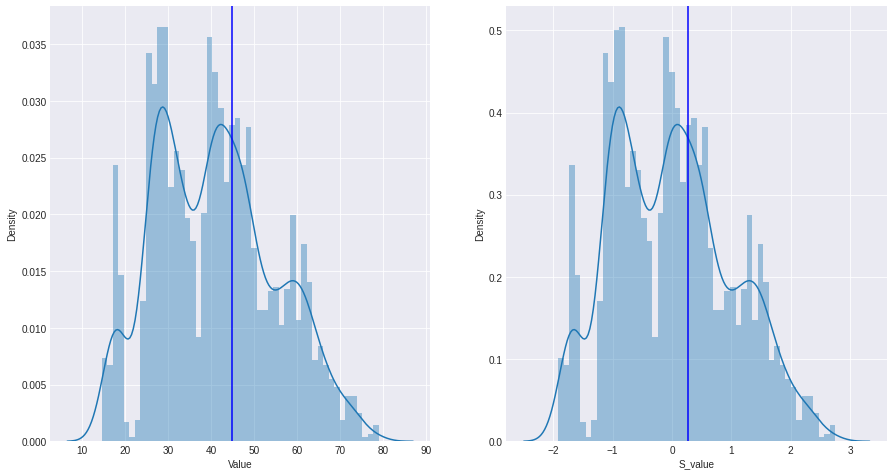

In [77]:
scale_plot(df_b)

The Valuation of The stock is: 44.9  and the scaled value is:  0.2660925572808558




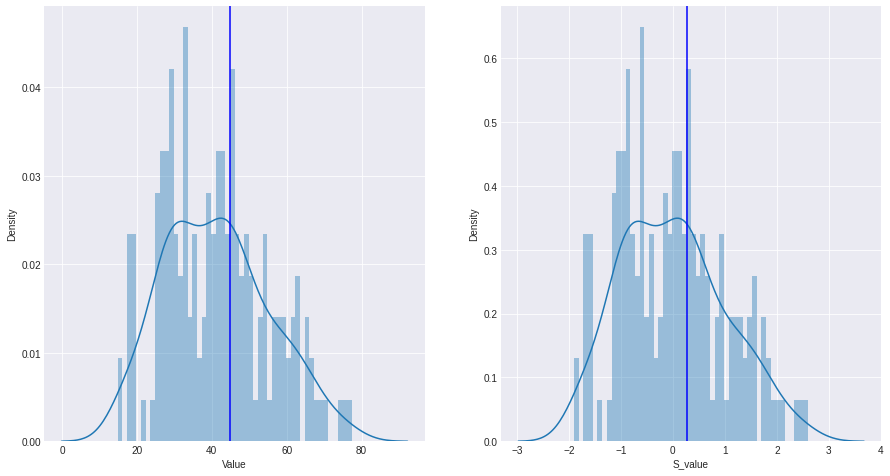

In [78]:
scale_plot(df_m)